# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: October 28, by 5:59pm**

**NOTE: There is a break from Oct 14 to Oct 24. To truly take advantage of the break, I would encouage you to ask all the questions before Oct 14 and after October 24, and use the extended break for its intended purpose.** 

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

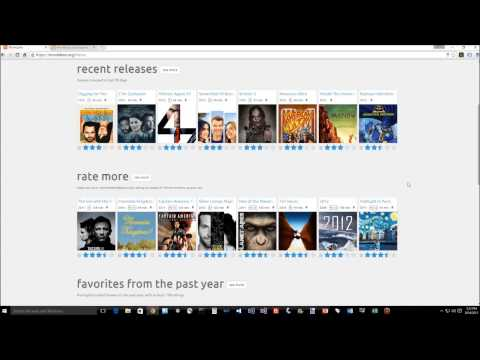

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** 

Please EDIT this cell and add the names of all the team members in your team:

    1. Ardavasd Ardahaldjian
    
    2. Joshua Levy
    
    3. River Yan
    
    4. Anson Zheng
 
 **Give your group a name**. ***Data Wranglers***

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above


# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import h5py as h5
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

In [2]:
# Import DAT files movies, ratings, and users
movie = pd.read_table('movies.dat', sep = '::', header = None)
rating = pd.read_table('ratings.dat', sep = '::', header = None)
user = pd.read_table('users.dat', sep = '::', header = None)
# Resource: https://pandas.pydata.org/docs/reference/api/pandas.read_table.html
# Resource: https://www.youtube.com/watch?v=qjOPsKHfC24&ab_channel=KindsonTheGenius

/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [3]:
# Add title to column name
movie.columns = ['MovieID', 'Title', 'Genres']
rating.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
user.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
# Resource: https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/

In [4]:
print(movie.head())
print(rating.head())
print(user.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [18]:
# Explore Dimension of all 3 data sets
print(movie.shape) # ncol = 3, nrow = 3883
print(rating.shape) # ncol = 4, nrow = 1000209
print(user.shape) # ncol = 5, nrow = 6040

(3883, 3)
(1000209, 4)
(6040, 5)


In [19]:
# Explore unique values of MovieID's in dataset movie and dataset rating 
print(len(movie['MovieID'].unique()))
print(len(rating['MovieID'].unique()))
# There are 3883 unique values of MovieID in dataset movie, 3706 unique values of MovieID in dataset rating
# Thus, not all movies are rated

3883
3706


In [20]:
# Merge all of the data into a single Pandas DataFrame
Data = pd.merge(rating, movie, on = "MovieID")
Data = pd.merge(Data, user, on = "UserID")
# Resource: https://pandas.pydata.org/docs/user_guide/merging.html

In [21]:
print(Data.shape)
print(Data.head(10))

(1000209, 10)
   UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   
5       1     1197       3  978302268              Princess Bride, The (1987)   
6       1     1287       5  978302039                          Ben-Hur (1959)   
7       1     2804       5  978300719               Christmas Story, A (1983)   
8       1      594       4  978302268  Snow White and the Seven Dwarfs (1937)   
9       1      919       4  978301368                Wizard of Oz, The (1939)   

                               Genres Gender  Age  Occupation Zip-code  
0                    

In [22]:
Data_Array = np.array(Data) 

In [23]:
print(Data_Array.shape)
print(Data_Array.dtype)

(1000209, 10)
object


In [24]:
# Store the data into an HDF5 file
with h5.File('MergedData.hdf5','w') as hdf:
    hdf.create_dataset('default', data = Data_Array, dtype = h5.string_dtype(encoding='utf-8'))
# Resource: https://docs.h5py.org/en/stable/special.html

In [25]:
# How many movies have an average rating over 4.5 overall?
meanMovieRating = Data.groupby('MovieID')['Rating'].mean()
print(sum(meanMovieRating >= 4.5), "movies have an average rating over 4.5 overall.")
# Resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

29 movies have an average rating over 4.5 overall.


In [26]:
# How many movies have an average rating over 4.5 among men? How about women?
meanMovieRatingMale = Data[Data.Gender == 'M'].groupby('MovieID')['Rating'].mean()
meanMovieRatingFemale = Data[Data.Gender == 'F'].groupby('MovieID')['Rating'].mean()
print(sum(meanMovieRatingMale >= 4.5), "movies have an average rating over 4.5 among men,", sum(meanMovieRatingFemale >= 4.5), "movies have an average rating over 4.5 among women.")

29 movies have an average rating over 4.5 among men, 70 movies have an average rating over 4.5 among women.


In [20]:
# How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
# In attribute Age, 25 indicates age between 25 and 34, and 35 indicate age between 35 and 44.
# If set age >= 30 or 35, it will miss the rating from users aged between 30 and 34.
# If set age >= 25, it will include the rating from users aged between 25 and 29, which are extra.
# A decision was made to use 35, after asking the instructor and TA.
medianMovieRatingMale30 = Data[Data.Gender == 'M'][Data.Age >= 35].groupby('MovieID')['Rating'].median()
medianMovieRatingFemale30 = Data[Data.Gender == 'F'][Data.Age >= 35].groupby('MovieID')['Rating'].median()
print(sum(medianMovieRatingMale30 >= 4.5),"have an median rating over 4.5 among men over age 30,",sum(medianMovieRatingFemale30 >= 4.5),"have an median rating over 4.5 among women over age 30.")

<ipython-input-20-376860439e85>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  medianMovieRatingMale30 = Data[Data.Gender == 'M'][Data.Age >= 35].groupby('MovieID')['Rating'].median()


105 have an median rating over 4.5 among men over age 30, 187 have an median rating over 4.5 among women over age 30.


<ipython-input-20-376860439e85>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  medianMovieRatingFemale30 = Data[Data.Gender == 'F'][Data.Age >= 35].groupby('MovieID')['Rating'].median()


In [27]:
# What are the ten most popular movies?
# Define popular movie as a movie has both average rating (Score) above the 98.2th percentile and number of rating (Counts) above the 98.7th percentile.
# If a movie has very high Score, but very low Counts, the high score only means the movie is liked by a few, not enough to be considered popular.
# If a movie has very high Counts, but very low Score, it means that most people don't like this movie, thus it is quit unpopular.
# However, a movie can be considered popular it has very high counts and very high score, which means many people watched it and liked it.
meanMovieRating = Data.groupby('MovieID')['Rating'].mean()
meanMovieRating = meanMovieRating.reset_index()
countMovieRating = Data.groupby('MovieID')['Rating'].count()
countMovieRating = countMovieRating.reset_index()
HighScore = np.percentile(meanMovieRating.Rating, 98.2)
HighCounts = np.percentile(countMovieRating.Rating, 98.7)
print("The 98.7th percentile of Counts is",HighCounts,", the 98.2th percentile of Score is",HighScore,".")
print("There are",sum(countMovieRating.Rating >= HighCounts), "movies above 98.7th percentile of Counts, and there are", sum(meanMovieRating.Rating >= HighScore), "movies above 98.2th percentile of Score.")
RatedGood = list(meanMovieRating[meanMovieRating.Rating >= HighScore].MovieID)
ManyWatched = list(countMovieRating[countMovieRating.Rating >= HighCounts].MovieID)
PopularMovieID = []
for i in range(0,len(RatedGood)):
    if RatedGood[i] in ManyWatched:
        PopularMovieID.append(RatedGood[i])
print(PopularMovieID)
PopularMovieTitle = []
for i in range(0, len(movie)):
    if movie.MovieID[i] in PopularMovieID:
        PopularMovieTitle.append(movie.Title[i])
print("The ten most popular movies are", PopularMovieTitle)

The 98.7th percentile of Counts is 1696.1750000000002 , the 98.2th percentile of Score is 4.333333333333333 .
There are 49 movies above 98.7th percentile of Counts, and there are 69 movies above 98.2th percentile of Score.
[50, 260, 318, 527, 593, 858, 1193, 1198, 2028, 2762]
The ten most popular movies are ['Usual Suspects, The (1995)', 'Star Wars: Episode IV - A New Hope (1977)', 'Shawshank Redemption, The (1994)', "Schindler's List (1993)", 'Silence of the Lambs, The (1991)', 'Godfather, The (1972)', "One Flew Over the Cuckoo's Nest (1975)", 'Raiders of the Lost Ark (1981)', 'Saving Private Ryan (1998)', 'Sixth Sense, The (1999)']


The variance of rating of male is 1.251542820263241 and the variance of rating of Female is 1.2348222000718903 .
Ttest_indResult(statistic=-19.86660702427606, pvalue=1.0)


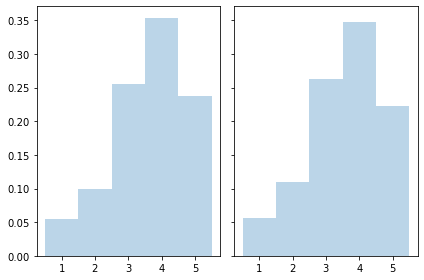

753769 ratings are from Male, 246440 ratings are from Female.


([<matplotlib.patches.Wedge at 0xebb7680c40>,
 [Text(-0.7865922284428242, 0.7689425636244571, ''),
  Text(0.7865922644396228, -0.7689425268014162, '')])

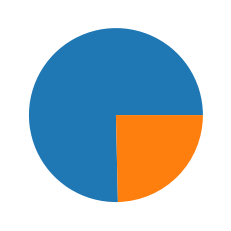

In [28]:
# Make some conjectures about how easy various groups are to please? Support your answers with data! (Part1)
# Explore whether male is easier to please than female. 
# Null hypothesis: mean of rating by male < mean of rating by female
# Alternative hypothesis: mean of rating by male >= mean of rating by female
# Create lists of ratings for male and female.
MovieRatingMale = list(Data[Data.Gender == 'M'].Rating)
MovieRatingFemale = list(Data[Data.Gender == 'F'].Rating)
# See if the variance is different.
print("The variance of rating of male is",np.var(MovieRatingMale),"and the variance of rating of Female is", np.var(MovieRatingFemale),".")
# The variance is similar, thus assume equal variance when perfroming two sample t-test.
print(stats.ttest_ind(a = MovieRatingMale, b = MovieRatingFemale, equal_var = True, alternative = 'greater'))
# The p-value of this t-test is 1.0, thus we fail to reject the null hypothesis, thus male is not easirt to please than female.
# Try to plot the both MovieRatingMale and MovieRatingFemale by histgram
fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)
axs[0].hist(MovieRatingFemale,[0.5,1.5,2.5,3.5,4.5,5.5],density=1,alpha=0.3)
axs[1].hist(MovieRatingMale,[0.5,1.5,2.5,3.5,4.5,5.5],density=1,alpha=0.3)
plt.show()
# See how many ratings are from male and female.
print(len(MovieRatingMale), "ratings are from Male,", len(MovieRatingFemale), "ratings are from Female.")
plt.pie([len(MovieRatingMale), len(MovieRatingFemale)])
# There amount of rating from male is 3 times as many as the ones from female, thus this conjecture might not be reliable.
# Resource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# Resource: https://matplotlib.org/stable/gallery/statistics/hist.html
# Resource: https://www.w3schools.com/python/matplotlib_pie_charts.asp

The variance of rating of users aged below 50 is 1.259710408279773 and the variance of rating of user aged above 50 is 1.1279903427772051 .
Ttest_indResult(statistic=-47.918663990454064, pvalue=1.0)


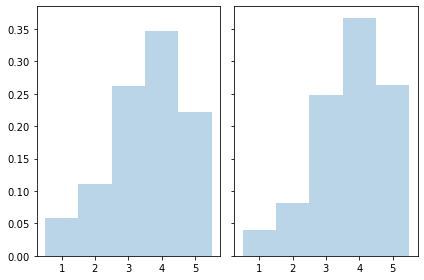


888939 ratings are from Male, 111270 ratings are from Female.


([<matplotlib.patches.Wedge at 0xebb9298f10>,
 [Text(-1.0335014550860517, 0.3766626372963133, ''),
  Text(1.0335014374532001, -0.3766626856780073, '')])

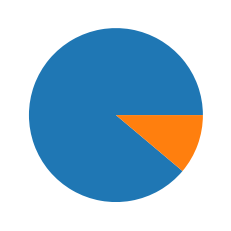

In [29]:
# Make some conjectures about how easy various groups are to please? Support your answers with data! (Part2)
# Explore whether users aged below 50 are easier to please than the user aged above 50.
# Null hypothesis: mean of rating by users aged below 50 < mean of rating by user aged above 50
# Alternative hypothesis: mean of rating by users aged below 50 >= mean of rating by user aged above 50
MovieRatingBelow50 = list(Data[Data.Age < 50].Rating)
MovieRatingAbove50 = list(Data[Data.Age >= 50].Rating)
# See if the variance is different.
print("The variance of rating of users aged below 50 is",np.var(MovieRatingBelow50),"and the variance of rating of user aged above 50 is", np.var(MovieRatingAbove50),".")
# The variance is similar, thus assumpe equal variance when perfroming two sample t-test.
print(stats.ttest_ind(a = MovieRatingBelow50, b = MovieRatingAbove50, equal_var = True, alternative = 'greater'))
# The p-value of this t-test is 1.0, thus we fail to reject the null hypothesis, thus users aged below 50 is not easier to please than users aged above 50.
# Try to plot the both MovieRatingBelow50 and MovieRatingAbove50 by histgram
fig, axs = plt.subplots(1, 2, sharey = True, tight_layout = True)
axs[0].hist(MovieRatingBelow50,[0.5,1.5,2.5,3.5,4.5,5.5],density=1,alpha=0.3)
axs[1].hist(MovieRatingAbove50,[0.5,1.5,2.5,3.5,4.5,5.5],density=1,alpha=0.3)
plt.show()
print()
# See how many ratings are from male and female.
print(len(MovieRatingBelow50), "ratings are from Male,", len(MovieRatingAbove50), "ratings are from Female.")
plt.pie([len(MovieRatingBelow50), len(MovieRatingAbove50)])
# There amount of rating from users aged below 50 is 8 times as many as the ones from users aged above 50, thus this conjecture might not be reliable.

3.6203660120110372

In [31]:
# movie.to_csv('C:/Users/LAPTOP/Downloads/Data Science/DS 501/Case Study 3/movies.csv')
# rating.to_csv('C:/Users/LAPTOP/Downloads/Data Science/DS 501/Case Study 3/ratings.csv')
# user.to_csv('C:/Users/LAPTOP/Downloads/Data Science/DS 501/Case Study 3/users.csv')

In [7]:
movie = pd.read_csv('./movies.csv')
rating = pd.read_csv('./ratings.csv')
user = pd.read_csv('./users.csv')

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------


Text(0, 0.5, 'Number of Movies')

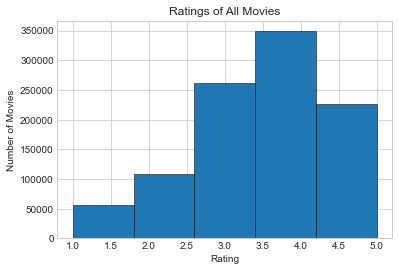

In [37]:
#Histogram 1
#Plot a histogram of the ratings of all movies
plt.style.use('seaborn-whitegrid')
plt.hist(rating['Rating'], bins = 5,edgecolor = '#000000', linewidth = 0.5)
plt.title('Ratings of All Movies')
plt.xlabel("Rating")
plt.ylabel("Number of Movies")

Text(0, 0.5, 'Rating Count')

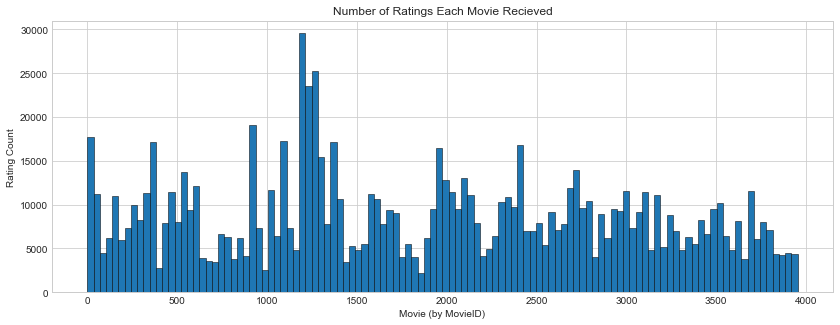

In [38]:
#Histogram 2
#Each entry per movieId is a rating
num_rating_per_movie = rating.value_counts("MovieID")
num_rating_per_movie = num_rating_per_movie.reset_index()
#Convert the series to a dataframe
df_rating_per_movie = pd.DataFrame(num_rating_per_movie)
#Rename column
df_rating_per_movie = df_rating_per_movie.rename(columns = {0:'Number of Ratings'})
#Plot a histogram of the number of ratings each movie recieved.
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
plt.hist(rating["MovieID"], bins = "auto", edgecolor = '#000000', linewidth = 0.5)
plt.title("Number of Ratings Each Movie Recieved")
plt.xlabel("Movie (by MovieID)")
plt.ylabel("Rating Count")

Text(0, 0.5, 'Frequency of Rating for Movies')

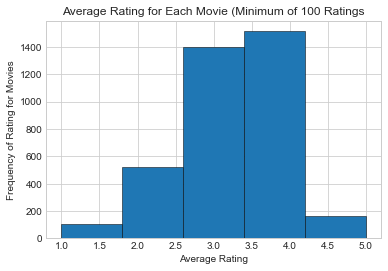

In [39]:
#Histogram 3
#Plot a histogram of the average rating for each movie
#Get average rating per movie
avg_rating = rating.groupby('MovieID')['Rating'].mean()
#Convert to dataframe
df_avgRating = pd.DataFrame(avg_rating)
#df_avgRating = df_avgRating.reset_index()
#Plot the histogram
plt.style.use('seaborn-whitegrid')
plt.hist(df_avgRating["Rating"], bins = 5, edgecolor = '#000000', linewidth = 0.5)
plt.title("Average Rating for Each Movie (Minimum of 100 Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency of Rating for Movies")

Text(0, 0.5, 'Movie (by MovieID)')

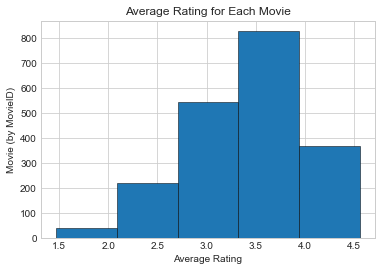

In [40]:
#Histogram 4
#Plot a histogram of the average rating for movies which are rated more than 100 times.

#Get average rating per movie
most_rated = rating.groupby('MovieID').agg({'Rating':[np.mean, np.size]})

#Check if movie was rated more than 100 times
check_100 = most_rated['Rating']['size'] > 100

#Return the average rating
atleast_100 = most_rated[check_100].sort_values([('Rating', 'mean')],ascending=False)

#Just get average
avg_rating_100 = atleast_100[('Rating', 'mean')]

#Convert to dataframe
df_avgRating_100 = pd.DataFrame(avg_rating_100)

#Plot the histogram
plt.style.use('seaborn-whitegrid')
plt.hist(df_avgRating_100["Rating"], bins = 5, edgecolor = '#000000', linewidth = 0.5)
plt.title("Average Rating for Each Movie")
plt.xlabel("Average Rating")
plt.ylabel("Movie (by MovieID)")

M    753769
F    246440
Name: Gender, dtype: int64
Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64
           count      mean       std  min  25%  50%  75%  max
Gender                                                       
F       246440.0  3.620366  1.111228  1.0  3.0  4.0  4.0  5.0
M       753769.0  3.568879  1.118724  1.0  3.0  4.0  4.0  5.0


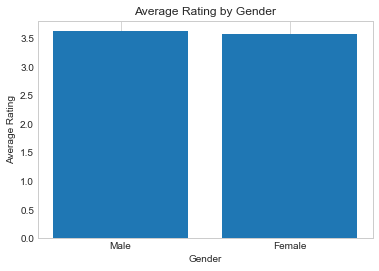

In [42]:
# Part E
# Gender conjecture
print(Data['Gender'].value_counts()) # Data is skewed towards males, keep in mind when reporting results
print(Data.groupby('Gender')['Rating'].mean().sort_values(ascending=False)) # Females are more likely to report a higher score 
print(Data.groupby('Gender')['Rating'].describe())
# One conjecture about the gender distribution is that they are more likely to give a higher rating because of their average 
# ratings. For females on average they give a rating of 3.62, while males on average give a rating of 3.57. However, one thing 
# to keep in mind is that the overall dataset of 1 million entries is skewed a lot more towards males, where about 75% of the 
# data are males and only 25% are females. This number will affect the average ratings.
mean = Data.groupby('Gender')['Rating'].mean()
plt.bar(['Male', 'Female'], list(Data.groupby('Gender')['Rating'].mean()))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Average Rating")
plt.title("Average Rating by Gender")
plt.show()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64
Age
56    3.766632
50    3.714512
45    3.638062
35    3.618162
1     3.549520
25    3.545235
18    3.507573
Name: Rating, dtype: float64
        count      mean       std  min  25%  50%  75%  max
Age                                                       
1     27211.0  3.549520  1.208417  1.0  3.0  4.0  4.0  5.0
18   183536.0  3.507573  1.165970  1.0  3.0  4.0  4.0  5.0
25   395556.0  3.545235  1.127175  1.0  3.0  4.0  4.0  5.0
35   199003.0  3.618162  1.078101  1.0  3.0  4.0  4.0  5.0
45    83633.0  3.638062  1.065385  1.0  3.0  4.0  4.0  5.0
50    72490.0  3.714512  1.061380  1.0  3.0  4.0  5.0  5.0
56    38780.0  3.766632  1.062551  1.0  3.0  4.0  5.0  5.0


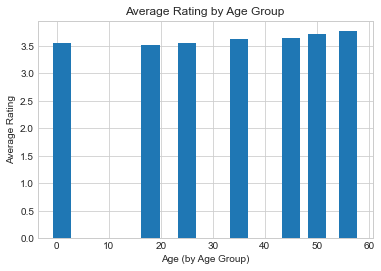

In [43]:
# Age Conjecture
print(Data['Age'].value_counts())
print(Data.groupby('Age')['Rating'].mean().sort_values(ascending=False))
print(Data.groupby('Age')['Rating'].describe())
# A conjecture about the age is that the oldest people rate the movies the highest. Therefore, they are more likely to rate a movie
# a 5. While teenage to middle aged adults are the least likely to rate a movie a 5 because their average was the lowest. Lastly, 
# little kids have the medium average where they are more likely to give a higher rating than teenagers and middle aged adults, but
# less likely to give a higher rating than the oldest people.
age_mean = Data.groupby('Age')['Rating'].mean()
index_age_mean = age_mean.reset_index()
plt.bar(list(index_age_mean['Age']), list(age_mean), width = 3.5)
plt.xlabel("Age (by Age Group)")
plt.ylabel("Average Rating")
plt.title("Average Rating by Age Group")
plt.show()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64
Genres
Animation|Comedy|Thriller              4.473837
Sci-Fi|War                             4.449890
Animation                              4.394336
Film-Noir|Mystery                      4.367424
Adventure|War                          4.346107
                                         ...   
Action|Adventure|Children's|Fantasy    2.090909
Comedy|Film-Noir|Thriller              2.000000
Action|Adventure|Children's|Sci-Fi     1.874286
Action|Children's                      1.742373
Action|Adventure|Children's            1.318182
Name: Rating, Length: 301, dt

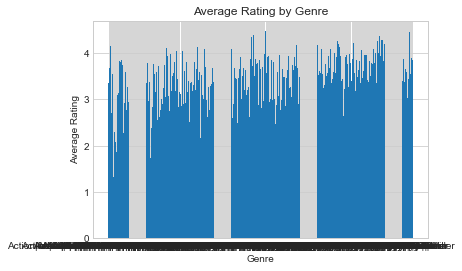

In [44]:
# Genre Conjecture
print(Data['Genres'].value_counts())
print(Data.groupby('Genres')['Rating'].mean().sort_values(ascending=False))
print(Data.groupby('Genres')['Rating'].describe())
# The highest average rated genre was animation, comedy, and thriller movies, while the lowest average rated genre was the action, 
# adventure, and children genre. This means that the animation, comedy, and thriller genre is more likely to receive a higher 
# rating, while action, adventure, and children is less likely to receive a lower rating closer to 0.
genre_mean = Data.groupby('Genres')['Rating'].mean()
genre = genre_mean.reset_index()
#print(list(genre['Genres']))
plt.bar(list(genre['Genres']), list(genre_mean))
#plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Genre")
plt.show()
# This one is messey because we have over 300 genre catagories. 
# We can show this but we need to also show the top/bottom 10 catagories. 

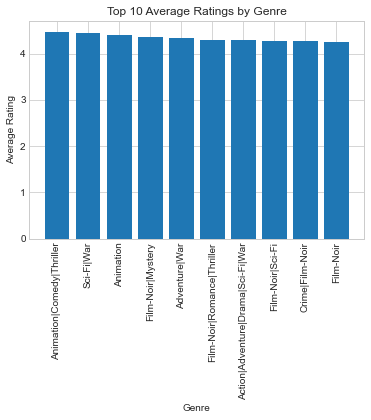

In [45]:
# Top 10 genre
top_10_genre = genre.sort_values('Rating', ascending = False).groupby('Rating').head()
top_10_genre = top_10_genre.nlargest(10, 'Rating')
#print(list(top_10_genre['Genres']))
plt.bar(list(top_10_genre['Genres']), list(top_10_genre['Rating']))
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Top 10 Average Ratings by Genre")
plt.show()

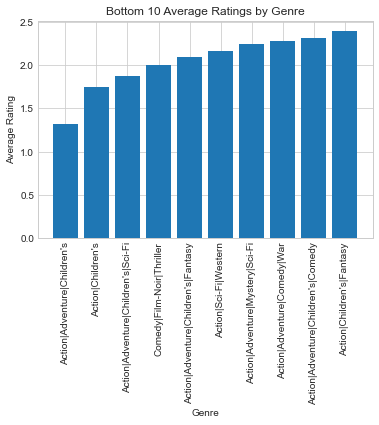

In [46]:
# Bottom 10 genre
bottom_10_genre = genre.sort_values('Rating', ascending = True).groupby('Rating').head()
bottom_10_genre = bottom_10_genre.nsmallest(10, 'Rating')
#print(list(bottom_10_genre['Genres']))
plt.bar(list(bottom_10_genre['Genres']), list(bottom_10_genre['Rating']))
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Bottom 10 Average Ratings by Genre")
plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [3]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

## Part 1

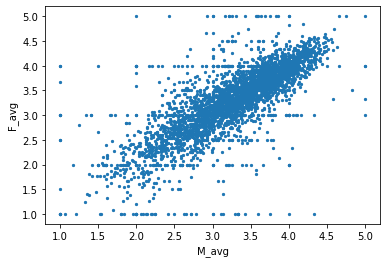

In [8]:
# ScatterPlot 1 (Make a scatter plot of men versus women and their mean rating for every movie.)
scatterplot1_df = pysqldf("SELECT rating.MovieID, user.Gender, avg(rating.Rating) AS 'avg' FROM rating LEFT JOIN user on rating.UserID = user.UserID GROUP BY rating.MovieID, user.Gender ORDER BY MovieID;")
scatterplot1_df.head()
scatterplot1_df_F = pysqldf("SELECT MovieID, Gender, avg as 'F_avg' FROM scatterplot1_df WHERE Gender = 'F';")
scatterplot1_df_M = pysqldf("SELECT MovieID, Gender, avg as 'M_avg' FROM scatterplot1_df WHERE Gender = 'M';")
scatterplot1_df = pysqldf("SELECT scatterplot1_df_M.MovieID, scatterplot1_df_M.M_avg, scatterplot1_df_F.F_avg FROM scatterplot1_df_M JOIN scatterplot1_df_F ON scatterplot1_df_M.MovieID = scatterplot1_df_F.MovieID;")
scatterplot1_df.plot.scatter(x = 'M_avg', y = 'F_avg' , s = 5);

## Part 2

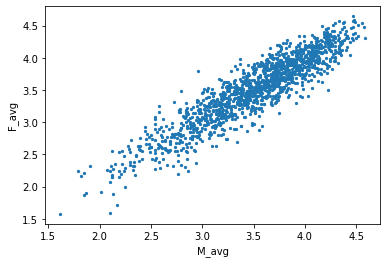

In [9]:
# Part 2
# ScatterPlot 2 (Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.)
scatterplot2_df_pre = scatterplot1_df
scatterplot2_df = pysqldf("SELECT MovieID, count(MovieID) AS ratingcount FROM rating GROUP BY MovieID ORDER BY MovieID;")
scatterplot2_df =  pysqldf("SELECT scatterplot2_df.MovieID, scatterplot2_df.ratingcount,  scatterplot2_df_pre.M_avg, scatterplot2_df_pre.F_avg FROM scatterplot2_df_pre JOIN scatterplot2_df ON scatterplot2_df_pre.MovieID = scatterplot2_df.MovieID WHERE ratingcount > 200;")
scatterplot2_df.plot.scatter(x = 'M_avg', y = 'F_avg' , s = 5);

## Part 3

In [11]:
# Part 3
# Part 3 (Compute the correlation coefficent between the ratings of men and women)(What do you observe? Are the ratings similiar or not? Support your answer with data!)
part3_df = scatterplot1_df
part3_df.head()
column_1 = scatterplot1_df["M_avg"]
column_2 = scatterplot1_df["F_avg"]
correlation = column_1.corr(column_2)
correlation

0.7631898908583271

## Part 4

In [12]:
#(10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
# For example, are men and women more similar when they are younger or older? ()


# Age Groups, We will look into the correlattion coefficents for Male and Female average ratings of movies, by age.
# 	1:  "Under 18"
# 	18:  "18-24"
# 	25:  "25-34"
# 	35:  "35-44"
# 	45:  "45-49"
# 	50:  "50-55"
# 	56:  "56+"

In [13]:
# Create DataFrame of MovieID, Age, Average_Rating_Men, Average_Rating_Woman
corr_master = pysqldf("SELECT rating.MovieID, user.Gender, user.Age, avg(rating.Rating) AS 'avg' FROM rating LEFT JOIN user on rating.UserID = user.UserID GROUP BY rating.MovieID, user.Gender, user.Age ORDER BY MovieID;")
corr_master.head(20)
corr_master_F = pysqldf("SELECT MovieID, age, Gender,  avg as 'F_avg' FROM corr_master WHERE Gender = 'F';")
corr_master_M = pysqldf("SELECT MovieID, age, Gender, avg as 'M_avg' FROM corr_master WHERE Gender = 'M';")
corr_master_M.head()
corr_master = pysqldf("SELECT corr_master_M.MovieID, corr_master_F.Age, corr_master_M.M_avg, corr_master_F.F_avg FROM corr_master_M JOIN corr_master_F ON corr_master_M.MovieID = corr_master_F.MovieID AND corr_master_M.Age = corr_master_F.Age ;")
corr_master.head()

,MovieID,Age,M_avg,F_avg
0,1,1,3.835616,4.076923
1,1,18,3.990654,4.086614
2,1,25,4.158433,4.325123
3,1,35,4.333333,4.232558
4,1,45,4.200000,3.916667


In [14]:
# corr M/F ratings, age 1- 18
corr_master_1_18 = pysqldf("SELECT * From corr_master WHERE Age = 1;")  
column_1_1_18 = corr_master_1_18["M_avg"]
column_2_1_18 = corr_master_1_18["F_avg"]
correlation_1_18 = column_1_1_18.corr(column_2_1_18)
correlation_1_18

0.3478844949483

In [15]:
# corr M/F ratings, age 18 - 24
corr_master_18_24 = pysqldf("SELECT * From corr_master WHERE Age = 18;")  
column_1_18_24 = corr_master_18_24["M_avg"]
column_2_18_24 = corr_master_18_24["F_avg"]
correlation_18_24 = column_1_18_24.corr(column_2_18_24)
correlation_18_24

0.575621742995653

In [16]:
# corr M/F ratings, age 25 - 34
corr_master_25_34 = pysqldf("SELECT * From corr_master WHERE Age = 25;")  
column_1_25_34 = corr_master_25_34["M_avg"]
column_2_25_34 = corr_master_25_34["F_avg"]
correlation_25_34 = column_1_25_34.corr(column_2_25_34)
correlation_25_34

0.686292856505323

In [17]:
# corr M/F ratings, age 35 - 44
corr_master_35_44 = pysqldf("SELECT * From corr_master WHERE Age = 35;")  
column_1_35_44 = corr_master_35_44["M_avg"]
column_2_35_44 = corr_master_35_44["F_avg"]
correlation_35_44 = column_1_35_44.corr(column_2_35_44)
correlation_35_44

0.5993980821580611

In [18]:
# corr M/F ratings, age 45 - 49
corr_master_45_49 = pysqldf("SELECT * From corr_master WHERE Age = 45;")  
column_1_45_49 = corr_master_45_49["M_avg"]
column_2_45_49 = corr_master_45_49["F_avg"]
correlation_45_49 = column_1_45_49.corr(column_2_45_49)
correlation_45_49

0.5689876364372755

In [19]:
# corr M/F ratings, age 50 - 55
corr_master_50_55 = pysqldf("SELECT * From corr_master WHERE Age = 50;")  
column_1_50_55 = corr_master_50_55["M_avg"]
column_2_50_55 = corr_master_50_55["F_avg"]
correlation_50_55 = column_1_50_55.corr(column_2_50_55)
correlation_50_55

0.536947758012114

In [20]:
# corr M/F ratings, age 56+
corr_master_56 = pysqldf("SELECT * From corr_master WHERE Age = 56;")  
column_1_56 = corr_master_56["M_avg"]
column_2_56 = corr_master_56["F_avg"]
correlation_56 = column_1_56.corr(column_2_56)
correlation_56

0.4130941228189282

In [21]:
array1 =[]
array1.append([1, correlation_1_18])
array1.append([2, correlation_18_24])
array1.append([3, correlation_25_34])
array1.append([4, correlation_35_44])
array1.append([5, correlation_45_49])
array1.append([6, correlation_50_55])
array1.append([7, correlation_56])
array1

[[1, 0.3478844949483],
 [2, 0.575621742995653],
 [3, 0.686292856505323],
 [4, 0.5993980821580611],
 [5, 0.5689876364372755],
 [6, 0.536947758012114],
 [7, 0.4130941228189282]]

In [23]:
df = pd.DataFrame(array1, columns=['age_range', 'correlation'])

([<matplotlib.axis.XTick at 0x7fd0f50bfbe0>,
 [Text(1, 0, '1-17'),
  Text(2, 0, '18-24'),
  Text(3, 0, '25-34'),
  Text(4, 0, '35-44'),
  Text(5, 0, '45-50'),
  Text(6, 0, '50-55'),
  Text(7, 0, '56+')])

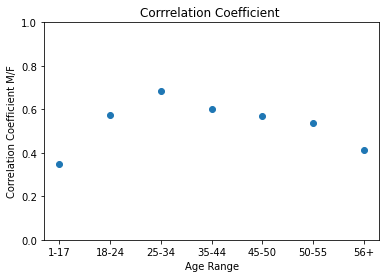

In [24]:
plt.scatter(df['age_range'], df['correlation'])
plt.ylim([0, 1])
plt.title("Corrrelation Coefficient ")
plt.xlabel("Age Range")
plt.ylabel("Correlation Coefficient M/F")

ticks = [1, 2, 3, 4, 5, 6, 7]
labels = ['1-17', '18-24', '25-34', '35-44', '45-50', '50-55', '56+']

plt.xticks(ticks, labels)
# Make your plot, set your axes labels

# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer. 
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

####  \~\~ write here \~\~

Conjectures were made through out this project to study the rating behavior of users by separating them into different groups based on different criterias, in particular by Gender and Age. For Gender, it was shown by different conjectures throught out the project that females tend to give a movie a higher score than male, thus males are harsher in terms of rating, in other words they are more difficult to please. When the hypothesis testing was performed, with null hypothesis males give lower rating than female on average, or harder to please; and the alternative hypothesis males give higher ratings than female on average, or easier to please. It was indicated that there is no sufficient evidence to reject this null hypothesis. Thus, males are not easier to please than females. When plotting the distribution of how males and females rated movies, the distribution looks roughly the same. Later on, when the mean of all ratings made by males and the mean and the mean of all ratings made by females are plotted, the mean for females is slightly higher. Therefore if you were the boss of a movie company looking to produce highly rated movies to draw acclaim than you should not consider whether or not the intended audience is male or female but rather focus on other factors. For Age, different conjectures were also made. Starting with a hypothesis testing on whether users below age 50 is easier to please than users above age 50. Null hypothesis was user age below 50 on average gave movies lower rating than user age above 50, or harder to please. Alternative hypothese was users below age 50 on average gave movies higher ratings than users aged 50 and above, or easier to please. The result of this test translates to not enough evidence to reject null hypothesis, which means users age below 50 are not easier to please than users age above 50. The distribution of rating of users aged below 50 and rating of users age above 50 does not look different when plotted on histogram. Later on, when the mean of all ratings by different age groups were plotted, it seems that younger age groups are harder to please. Therefore if you were the boss of a movie company looking to produce highly rated movies to a specific age group the age 50 and below demograhic is going to be your harshest critics. Therefore, they should consider creating movies that appeal to that demograhphic. A business question that could be answered by the data: are animated movies not marketed to children (i.e. dont have children as part of their genre tag, but can have any other combonation of tags) consistly rated higher than animated movies with "children" as part of the tag.

# Report: communicate the results (15 points) 

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you. 

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Two teams will be randomly chosen to present in the class.

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**